In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "potato",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())  # For first image.

[[[ 99.  88. 102.]
  [114. 103. 117.]
  [100.  89. 103.]
  ...
  [112. 102. 113.]
  [112. 102. 113.]
  [108.  98. 109.]]

 [[112. 101. 115.]
  [113. 102. 116.]
  [ 99.  88. 102.]
  ...
  [105.  95. 106.]
  [108.  98. 109.]
  [106.  96. 107.]]

 [[104.  93. 107.]
  [ 93.  82.  96.]
  [ 88.  77.  91.]
  ...
  [105.  95. 106.]
  [107.  97. 108.]
  [106.  96. 107.]]

 ...

 [[177. 175. 186.]
  [179. 177. 188.]
  [181. 179. 190.]
  ...
  [147. 141. 151.]
  [148. 142. 152.]
  [150. 144. 154.]]

 [[176. 174. 185.]
  [177. 175. 186.]
  [180. 178. 189.]
  ...
  [148. 142. 152.]
  [149. 143. 153.]
  [150. 144. 154.]]

 [[176. 174. 185.]
  [177. 175. 186.]
  [179. 177. 188.]
  ...
  [149. 143. 153.]
  [150. 144. 154.]
  [151. 145. 155.]]]


In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())  # In output 32 ia batch size, 256 image size and 3 is RGB range.

(32, 256, 256, 3)
[0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 2 2 1 1 1 1 1 1 1 1 0]


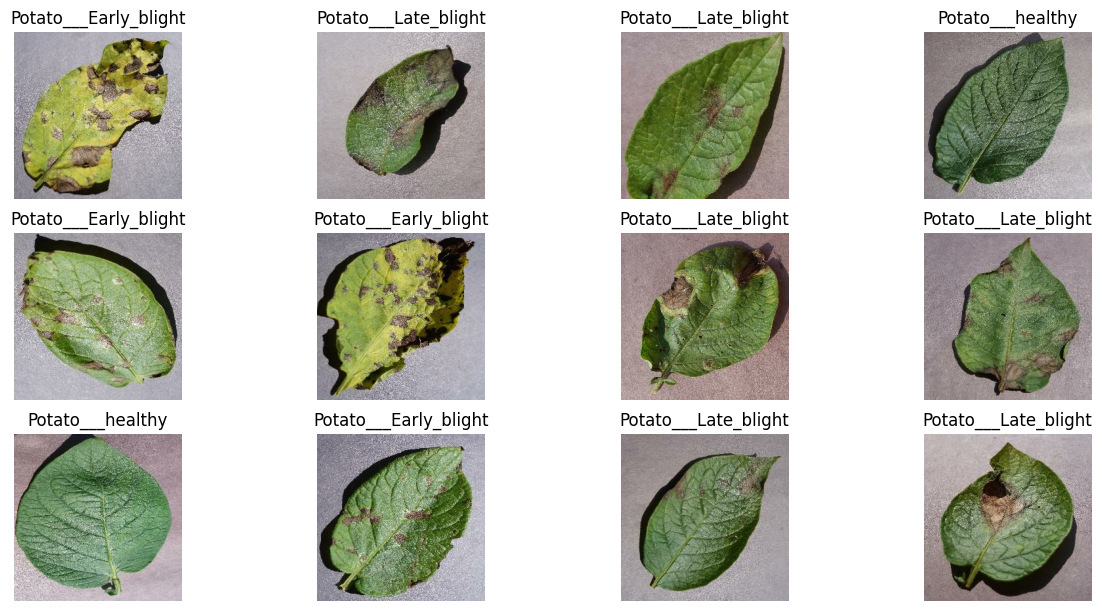

In [8]:
plt.figure(figsize = (15,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy(). astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [9]:
len(dataset)

68

In [10]:
# 80% training
# 20% => 10% validation and 10% test

In [11]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [12]:
train_ds = dataset.take(54)
len(train_ds)

54

In [13]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [14]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [15]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [16]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [17]:
def get_dataset_partions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split *ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [18]:
train_ds, val_ds, test_ds = get_dataset_partions_tf(dataset)

In [19]:
len(train_ds)

54

In [20]:
len(val_ds)

6

In [21]:
len(test_ds)

8

In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE) # Cacheing.
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [23]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [25]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)  # Remove batch size from input_shape
n_classes = 3

model = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE, input_shape=input_shape),  # Add input_shape here
    layers.Rescaling(1.0 / 255),
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(4, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])



C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing_1 (Resizing)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           1,028 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 168,147 (656.82 KB)

 Trainable params: 168,147 (656.82 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [28]:
history = model.fit(
    train_ds,
    epochs = 50, 
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 187s 3s/step - accuracy: 0.4831 - loss: 0.9655 - val_accuracy: 0.6354 - val_loss: 0.7802
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.6959 - loss: 0.7413 - val_accuracy: 0.6354 - val_loss: 0.8171
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.7744 - loss: 0.5985 - val_accuracy: 0.7292 - val_loss: 0.6984
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.7331 - loss: 0.5984 - val_accuracy: 0.8073 - val_loss: 0.4013
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.8153 - loss: 0.4075 - val_accuracy: 0.8854 - val_loss: 0.2781
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.8544 - loss: 0.3199 - val_accuracy: 0.8229 - val_loss: 0.3618
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.8809 - loss: 0.2986 - val_accuracy: 0.9167 - val_loss: 0.2363
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.9245 - loss: 0.2751 - val_accuracy: 0.9635 - v

In [29]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 376ms/step - accuracy: 0.9896 - loss: 0.0556


In [30]:
scores

[0.0891556590795517, 0.98046875]

In [31]:
history

In [32]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [33]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


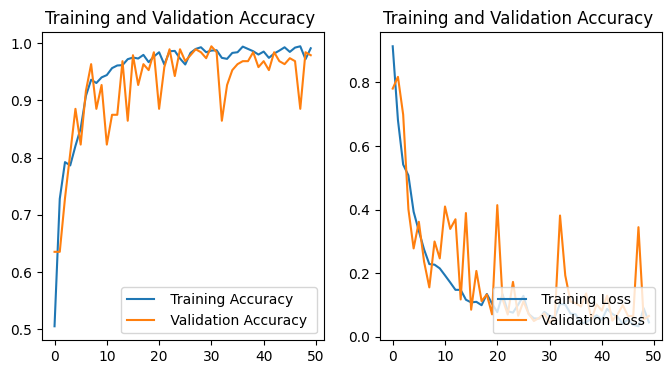

In [42]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
plt.plot(range(50), acc, label = " Training Accuracy ")
plt.plot(range(50), val_acc, label = " Validation Accuracy ")
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy ')

plt.subplot(1,2,2)
plt.plot(range(50), loss, label = " Training Loss ")
plt.plot(range(50), val_loss, label = " Validation Loss ")
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy ')
plt.show()

first image to predict 
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
predicted label is:  Potato___Early_blight


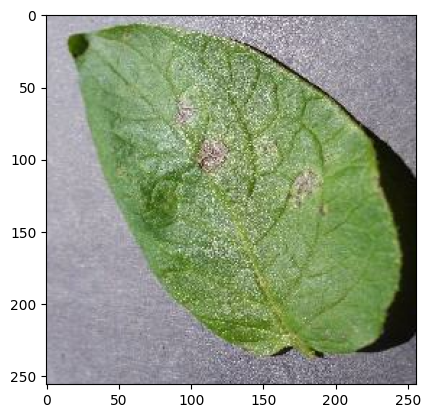

In [37]:
import numpy as np
for images_batch, labels_batch  in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()

    print("first image to predict ")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])

    batch_pred = model.predict(images_batch)
    print("predicted label is: ",class_names[np.argmax(batch_pred[0])])